In [1]:
#Necessary imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score)

In [2]:
#load the cleaned CSV
df = pd.read_csv('../data/noshowappointments_cleaned.csv')
df.head()

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,days_until_appointment,neighbourhood_freq
0,1,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,0,1,0,0,0,0,0,1,592
1,1,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,0,0,0,0,0,0,1,1,533
2,1,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,0,0,0,0,0,0,1,1,533
3,1,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,0,0,0,0,0,0,0,1,472
4,1,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,0,0,0,0,0,0,0,1,1186


In [3]:
df = df.drop(columns =['scheduledday','appointmentday'])

In [4]:
#target variable
y = df['no_show']

#Feature set
X = df.drop(columns =['no_show'], errors='ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")
print("Target Distribution (Train):")
print(y_train.value_counts(normalize=True))

Train shape: (57567, 10)
Test shape: (14392, 10)
Target Distribution (Train):
no_show
0    0.714802
1    0.285198
Name: proportion, dtype: float64


In [5]:
# Initialize and train
baseline = LogisticRegression(max_iter=10000, solver='liblinear')  # liblinear is better for small/medium datasets
baseline.fit(X_train, y_train)

# Predict on test set
y_pred = baseline.predict(X_test)
y_proba = baseline.predict_proba(X_test)[:, 1]  # for roc-auc

In [6]:
#Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[10270    18]
 [ 4090    14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.83     10288
           1       0.44      0.00      0.01      4104

    accuracy                           0.71     14392
   macro avg       0.58      0.50      0.42     14392
weighted avg       0.64      0.71      0.60     14392



In [7]:
auc = roc_auc_score(y_test, y_proba)
print(f"\nROC-AUC Score: {auc:.4f}")



ROC-AUC Score: 0.5765


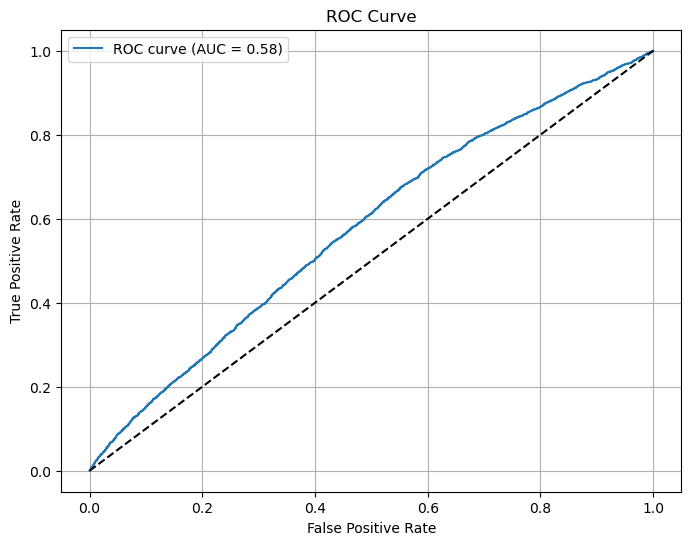

In [8]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


Confusion Matrix:
[[5532 4756]
 [1751 2353]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.54      0.63     10288
           1       0.33      0.57      0.42      4104

    accuracy                           0.55     14392
   macro avg       0.55      0.56      0.52     14392
weighted avg       0.64      0.55      0.57     14392


ROC-AUC Score: 0.5800


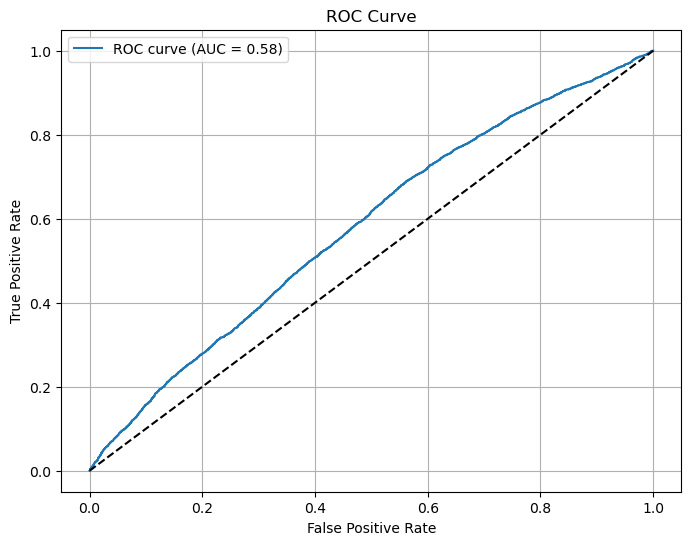

In [9]:
# Initialize and train
baseline2 = LogisticRegression(max_iter=10000, solver='liblinear', class_weight='balanced')  # liblinear is better for small/medium datasets
baseline2.fit(X_train, y_train)

# Predict on test set
y_pred = baseline2.predict(X_test)
y_proba = baseline2.predict_proba(X_test)[:, 1]  

#Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, y_proba)
print(f"\nROC-AUC Score: {auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

Logistic Regression – Baseline Summary

 Model:
- Algorithm: Logistic Regression
- Settings:
  - Solver: `'liblinear'`
  - Max Iterations: `10000`
  - Class Weight: `'balanced'`



Evaluation:

- Accuracy: ~55%
- Precision (No-Show): 0.33
- Recall (No-Show): 0.57 
- F1-Score (No-Show): 0.42
- ROC-AUC Score: 0.58


Explanation:

- Applying `class_weight='balanced'` helped the model detect no-shows much better, increasing recall from `0.00` to `0.57`
- This is a trade-off — we accept more false positives in return for catching actual missed appointments
- The ROC-AUC shows weak but non-random classification — a reasonable baseline



In [10]:
import joblib

# Save the trained model
joblib.dump(baseline2, '../models/logreg_baseline.pkl')

['../models/logreg_baseline.pkl']